# Task
Perform k-means clustering on the data in "life_expectancy.csv", visualize the clusters, and evaluate the clustering results.

## Load the data

### Subtask:
Load the `life_expectancy.csv` file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('life_expectancy.csv')
display(df.head())

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


## Prepare the data

### Subtask:
Select the relevant columns for clustering and handle missing values if necessary.


**Reasoning**:
Inspect the dataframe columns and types to identify numerical columns suitable for k-means clustering and check for missing values.



In [2]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               200 non-null    object 
 1   Sum of Females  Life Expectancy       200 non-null    float64
 2   Sum of Life Expectancy  (both sexes)  200 non-null    float64
 3   Sum of Males  Life Expectancy         200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


None

,0
Country,0
Sum of Females Life Expectancy,0
Sum of Life Expectancy (both sexes),0
Sum of Males Life Expectancy,0


**Reasoning**:
Based on the dataframe info, the columns 'Sum of Females Life Expectancy', 'Sum of Life Expectancy (both sexes)', and 'Sum of Males Life Expectancy' are numerical and have no missing values, making them suitable for k-means clustering. Select these columns for clustering.



In [3]:
clustering_data = df[['Sum of Females  Life Expectancy', 'Sum of Life Expectancy  (both sexes)', 'Sum of Males  Life Expectancy']]
display(clustering_data.head())

,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,57.19,55.24,53.36
1,54.94,54.64,54.33
2,60.75,57.74,54.76
3,60.44,57.80,55.03
4,59.56,57.67,55.51


## Determine the optimal number of clusters

### Subtask:
Use a method like the elbow method to find the optimal number of clusters (k).


**Reasoning**:
The subtask requires finding the optimal number of clusters using the elbow method. This involves importing KMeans and plotting the inertia for different numbers of clusters.



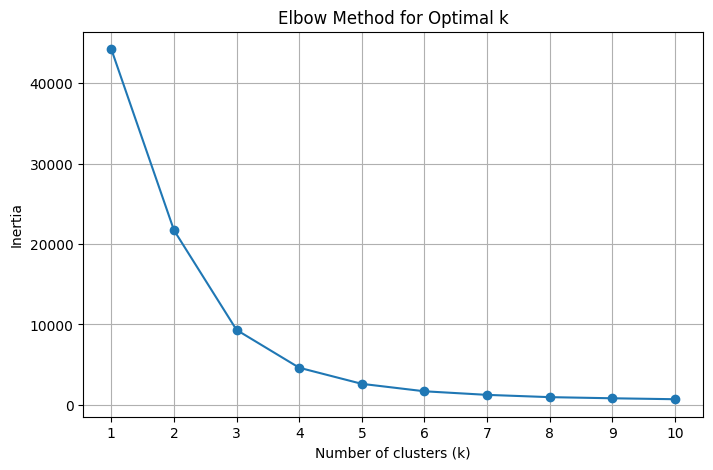

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Perform k-means clustering

### Subtask:
Apply the K-Means algorithm with the optimal k to the data.


**Reasoning**:
Apply the KMeans algorithm with the optimal k (which is 3 based on the elbow plot from the previous step) to the data and add the cluster labels to the original dataframe.



In [5]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(clustering_data)

df['Cluster'] = kmeans.labels_
display(df.head())

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy,Cluster
0,Chad,57.19,55.24,53.36,0
1,Nigeria,54.94,54.64,54.33,0
2,South Sudan,60.75,57.74,54.76,0
3,Lesotho,60.44,57.80,55.03,0
4,Central African Republic,59.56,57.67,55.51,0


## Visualize the clusters

### Subtask:
Visualize the clusters using scatter plots of the life expectancy columns, colored by cluster.


**Reasoning**:
Generate scatter plots to visualize the clusters based on the life expectancy columns, colored by the assigned clusters.



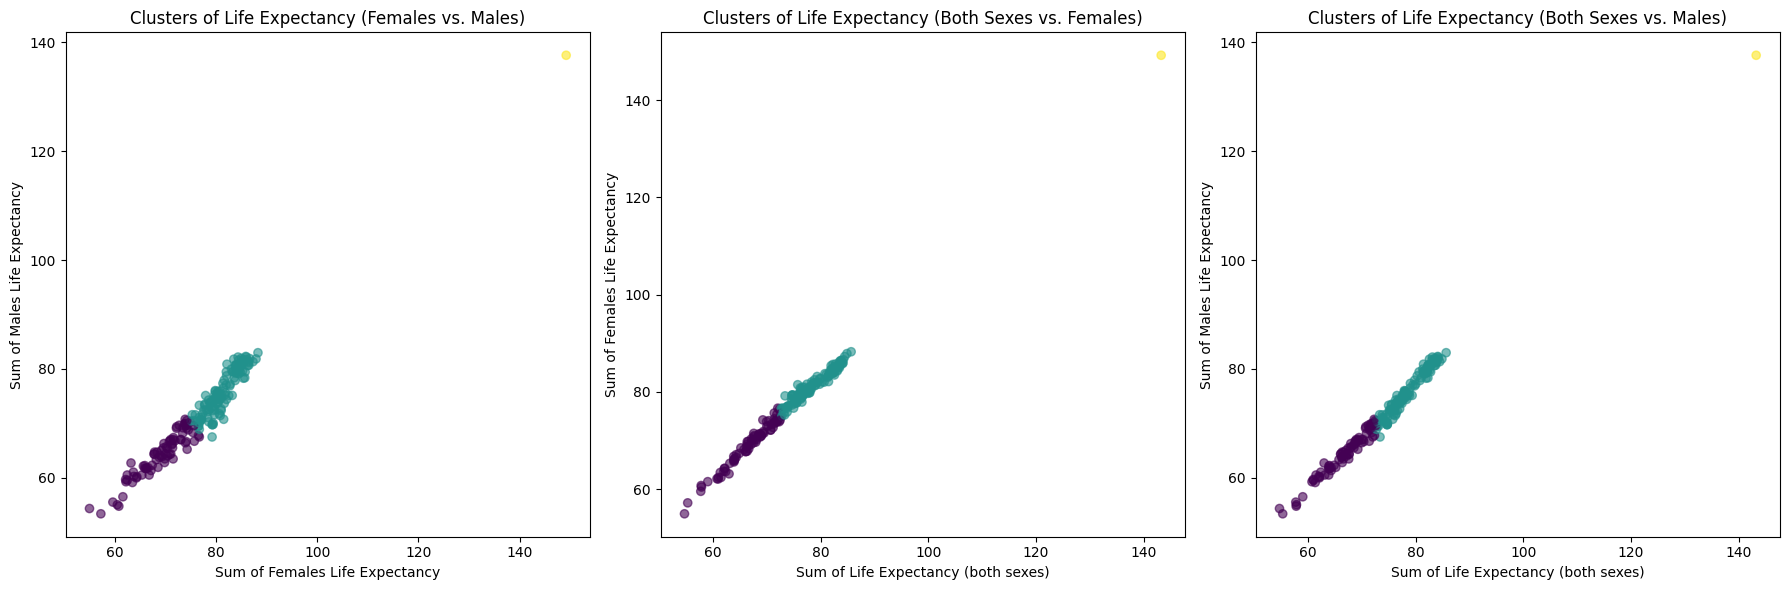

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Plot 1: Females vs. Males Life Expectancy
plt.subplot(1, 3, 1)
plt.scatter(df['Sum of Females  Life Expectancy'], df['Sum of Males  Life Expectancy'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Sum of Females Life Expectancy')
plt.ylabel('Sum of Males Life Expectancy')
plt.title('Clusters of Life Expectancy (Females vs. Males)')

# Plot 2: Both Sexes vs. Females Life Expectancy
plt.subplot(1, 3, 2)
plt.scatter(df['Sum of Life Expectancy  (both sexes)'], df['Sum of Females  Life Expectancy'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Sum of Life Expectancy (both sexes)')
plt.ylabel('Sum of Females Life Expectancy')
plt.title('Clusters of Life Expectancy (Both Sexes vs. Females)')

# Plot 3: Both Sexes vs. Males Life Expectancy
plt.subplot(1, 3, 3)
plt.scatter(df['Sum of Life Expectancy  (both sexes)'], df['Sum of Males  Life Expectancy'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Sum of Life Expectancy (both sexes)')
plt.ylabel('Sum of Males Life Expectancy')
plt.title('Clusters of Life Expectancy (Both Sexes vs. Males)')

plt.tight_layout()
plt.show()

## Evaluate the clustering

### Subtask:
Evaluate the clustering results using appropriate metrics like silhouette score.


**Reasoning**:
Calculate and print the silhouette score to evaluate the clustering results.



In [7]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_data, df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.5725869527034914


## Present the results

### Subtask:
Display the clustering results, including the cluster assignments for each country and the silhouette score.


**Reasoning**:
Display the first few rows of the DataFrame with the cluster assignments and print the calculated silhouette score to present the clustering results.



In [8]:
display(df.head())
print(f"The average silhouette score is: {silhouette_avg}")

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy,Cluster
0,Chad,57.19,55.24,53.36,0
1,Nigeria,54.94,54.64,54.33,0
2,South Sudan,60.75,57.74,54.76,0
3,Lesotho,60.44,57.80,55.03,0
4,Central African Republic,59.56,57.67,55.51,0


The average silhouette score is: 0.5725869527034914


## Summary:

### Data Analysis Key Findings

*   The dataset contains life expectancy data for various countries, including "Sum of Females Life Expectancy", "Sum of Life Expectancy (both sexes)", and "Sum of Males Life Expectancy".
*   The selected columns for clustering ("Sum of Females Life Expectancy", "Sum of Life Expectancy (both sexes)", and "Sum of Males Life Expectancy") contain no missing values.
*   Based on the elbow method plot, an optimal number of 3 clusters was chosen for the K-Means algorithm.
*   The K-Means algorithm successfully assigned each country to one of the 3 clusters.
*   The average silhouette score for the clustering is approximately 0.573, indicating a reasonably good separation between the clusters.
*   Scatter plots visualize the clusters across different pairs of life expectancy metrics, showing distinct groupings.

### Insights or Next Steps

*   Analyze the characteristics of each cluster (e.g., average life expectancy values within each cluster) to understand what defines each group of countries.
*   Explore adding other relevant features (e.g., GDP, healthcare spending) to the clustering process to see if it improves cluster separation and provides more meaningful groupings.
